In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import datetime

In [10]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import f_oneway

In [11]:
df = pd.read_csv(r"C:\Users\sastr\Downloads\campaign - campaign.csv")

**Note: Please find Insights and Conclusion at the end of the code notebook**

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,2,7,1,0,0,0,0,0,SP


In [13]:
df.shape

(2239, 27)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [15]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
dtype: int64

**Column cleaning**

In [16]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype("float64")
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2234    66476.0
2235    31056.0
2236    46310.0
2237    65819.0
2238    94871.0
Name: Income, Length: 2239, dtype: float64

In [17]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Country                 0
dtype: int64

In [18]:
#Filling nan values with median value
df['Income'] = df['Income'].fillna(df['Income'].median())

In [19]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Country                0
dtype: int64

In [20]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\1633371766.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


Creating Age and Age bracket column

In [21]:
df['Current Year'] = datetime.datetime.now().year
df['Age'] = df['Current Year'] - df['Year_Birth']
df['Age']

0       54
1       63
2       66
3       57
4       35
        ..
2234    48
2235    47
2236    48
2237    46
2238    55
Name: Age, Length: 2239, dtype: int64

In [22]:
df['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900], dtype=int64)

In [23]:
min = df['Age'].min()
max = df['Age'].max()
print(min)
print(max)

28
131


Creating a different dataframe for those above 80 for possible outlier analysis

In [24]:
df_outlier = df[df['Age'] > 80]

In [25]:
df_new = df[df['Age'] <= 80]

In [26]:
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Current Year,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,0,SP,2024,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,0,CA,2024,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,US,2024,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,AUS,2024,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,0,SP,2024,35


In [27]:
bins = [25,35,45,55,65,75,85]
df_new['Age_Bracket'] = pd.cut(df_new['Age'],bins)
df_new.head()

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\2449892035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Age_Bracket'] = pd.cut(df_new['Age'],bins)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Current Year,Age,Age_Bracket
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,0,SP,2024,54,"(45, 55]"
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,0,CA,2024,63,"(55, 65]"
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,2024,66,"(65, 75]"
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2024,57,"(55, 65]"
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,0,SP,2024,35,"(25, 35]"


Creating join month and join year from Dt_Customer column

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2227 entries, 0 to 2238
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2227 non-null   int64         
 1   Year_Birth           2227 non-null   int64         
 2   Education            2227 non-null   object        
 3   Marital_Status       2227 non-null   object        
 4   Income               2227 non-null   float64       
 5   Kidhome              2227 non-null   int64         
 6   Teenhome             2227 non-null   int64         
 7   Dt_Customer          2227 non-null   datetime64[ns]
 8   Recency              2227 non-null   int64         
 9   MntWines             2227 non-null   int64         
 10  MntFruits            2227 non-null   int64         
 11  MntMeatProducts      2227 non-null   int64         
 12  MntFishProducts      2227 non-null   int64         
 13  MntSweetProducts     2227 non-null   i

In [29]:
df_new['Join_Month'] = df_new['Dt_Customer'].dt.month

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\1712690495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Join_Month'] = df_new['Dt_Customer'].dt.month


In [30]:
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Current Year,Age,Age_Bracket,Join_Month
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,SP,2024,54,"(45, 55]",6
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,0,CA,2024,63,"(55, 65]",6
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,2024,66,"(65, 75]",5
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2024,57,"(55, 65]",5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,0,SP,2024,35,"(25, 35]",4


In [31]:
df_new['Join_Year'] = df_new['Dt_Customer'].dt.year

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\2448095384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Join_Year'] = df_new['Dt_Customer'].dt.year


In [32]:
df_new['Income_Median'] = df['Income'].apply(lambda x : 'Above' if x > df['Income'].median() else 'Below')

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\3269919320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Income_Median'] = df['Income'].apply(lambda x : 'Above' if x > df['Income'].median() else 'Below')


In [33]:
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Country,Current Year,Age,Age_Bracket,Join_Month,Join_Year,Income_Median
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,SP,2024,54,"(45, 55]",6,2014,Above
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,0,CA,2024,63,"(55, 65]",6,2014,Above
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,US,2024,66,"(65, 75]",5,2014,Above
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,AUS,2024,57,"(55, 65]",5,2014,Below
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,SP,2024,35,"(25, 35]",4,2014,Below


**Univariate categorical analysis**

In [34]:
cat_cols = ['Education', 'Marital_Status','Country','Age_Bracket']

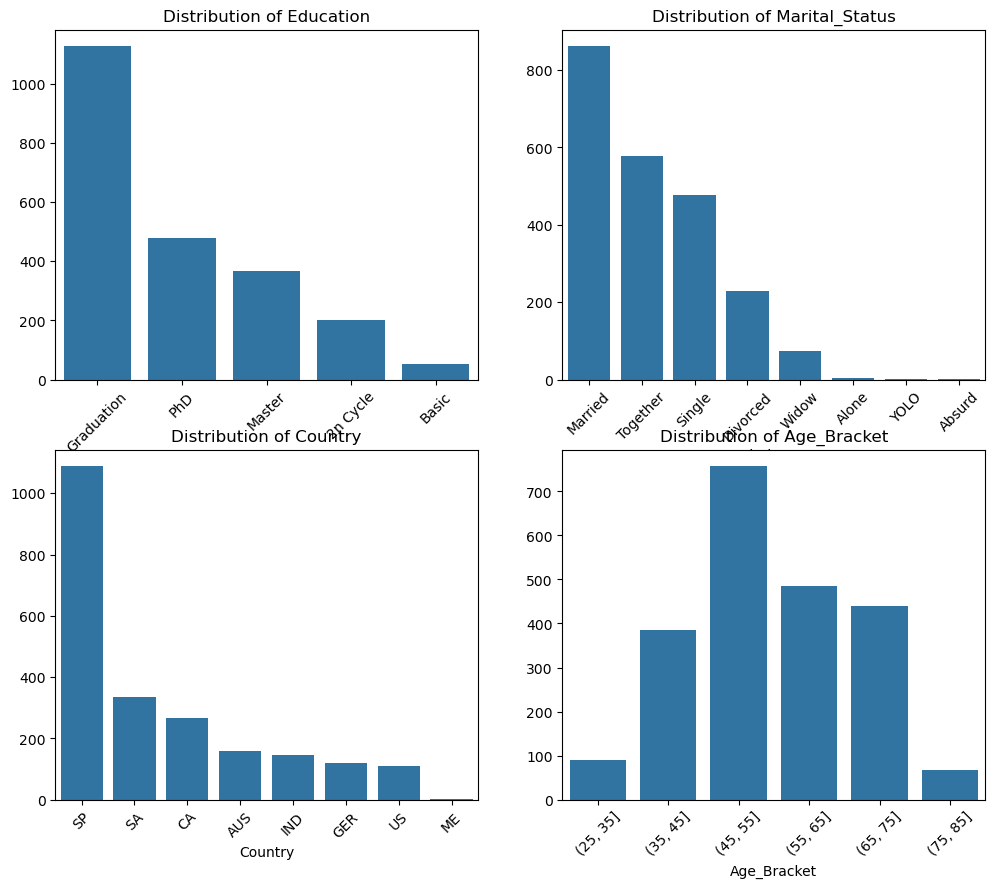

In [35]:
plt.figure(figsize=(12,10))

for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    counts = df_new[cat_cols[i]].value_counts()
    sns.barplot( x = counts.index,y = counts.values)
    plt.title("Distribution of {feature}".format(feature=cat_cols[i]))
    plt.xticks(rotation = 45)
plt.show()

In [36]:
cat_cols = ['Kidhome', 'Teenhome','Join_Month','Join_Year']

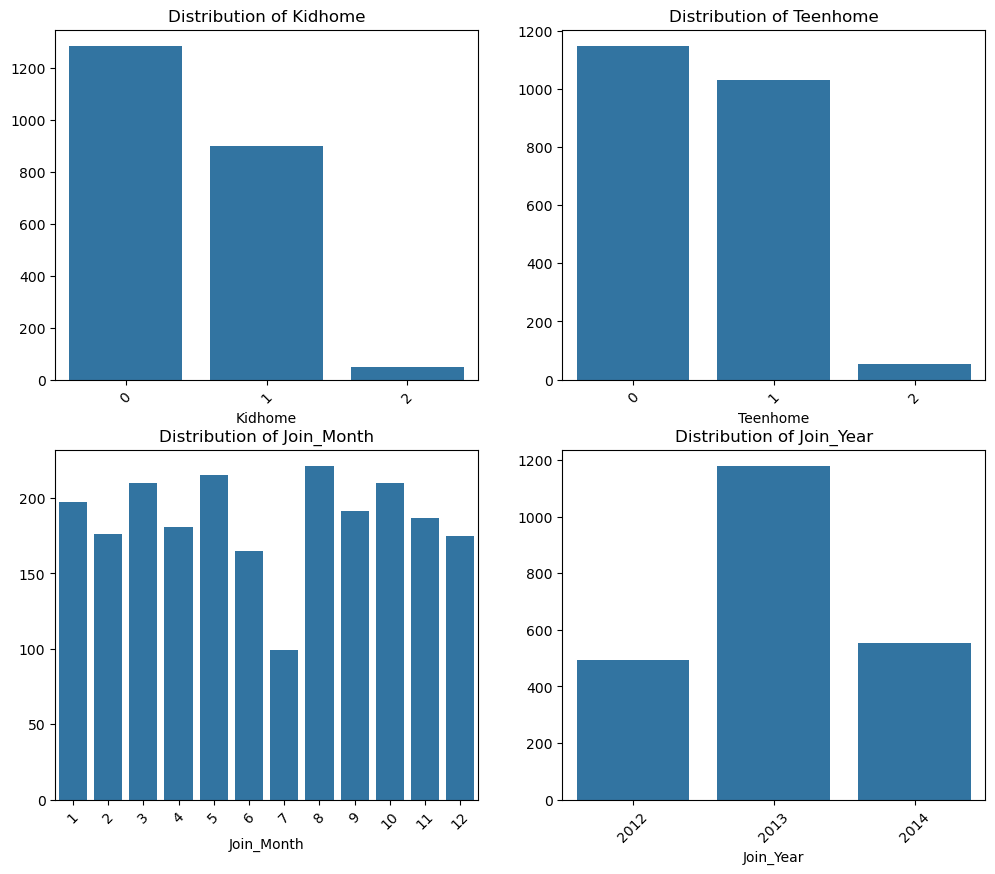

In [37]:
plt.figure(figsize=(12,10))

for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    counts = df_new[cat_cols[i]].value_counts()
    sns.barplot( x = counts.index,y = counts.values)
    plt.title("Distribution of {feature}".format(feature=cat_cols[i]))
    plt.xticks(rotation = 45)
plt.show()

Binary variable visualization

In [39]:
binary_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Income_Median']

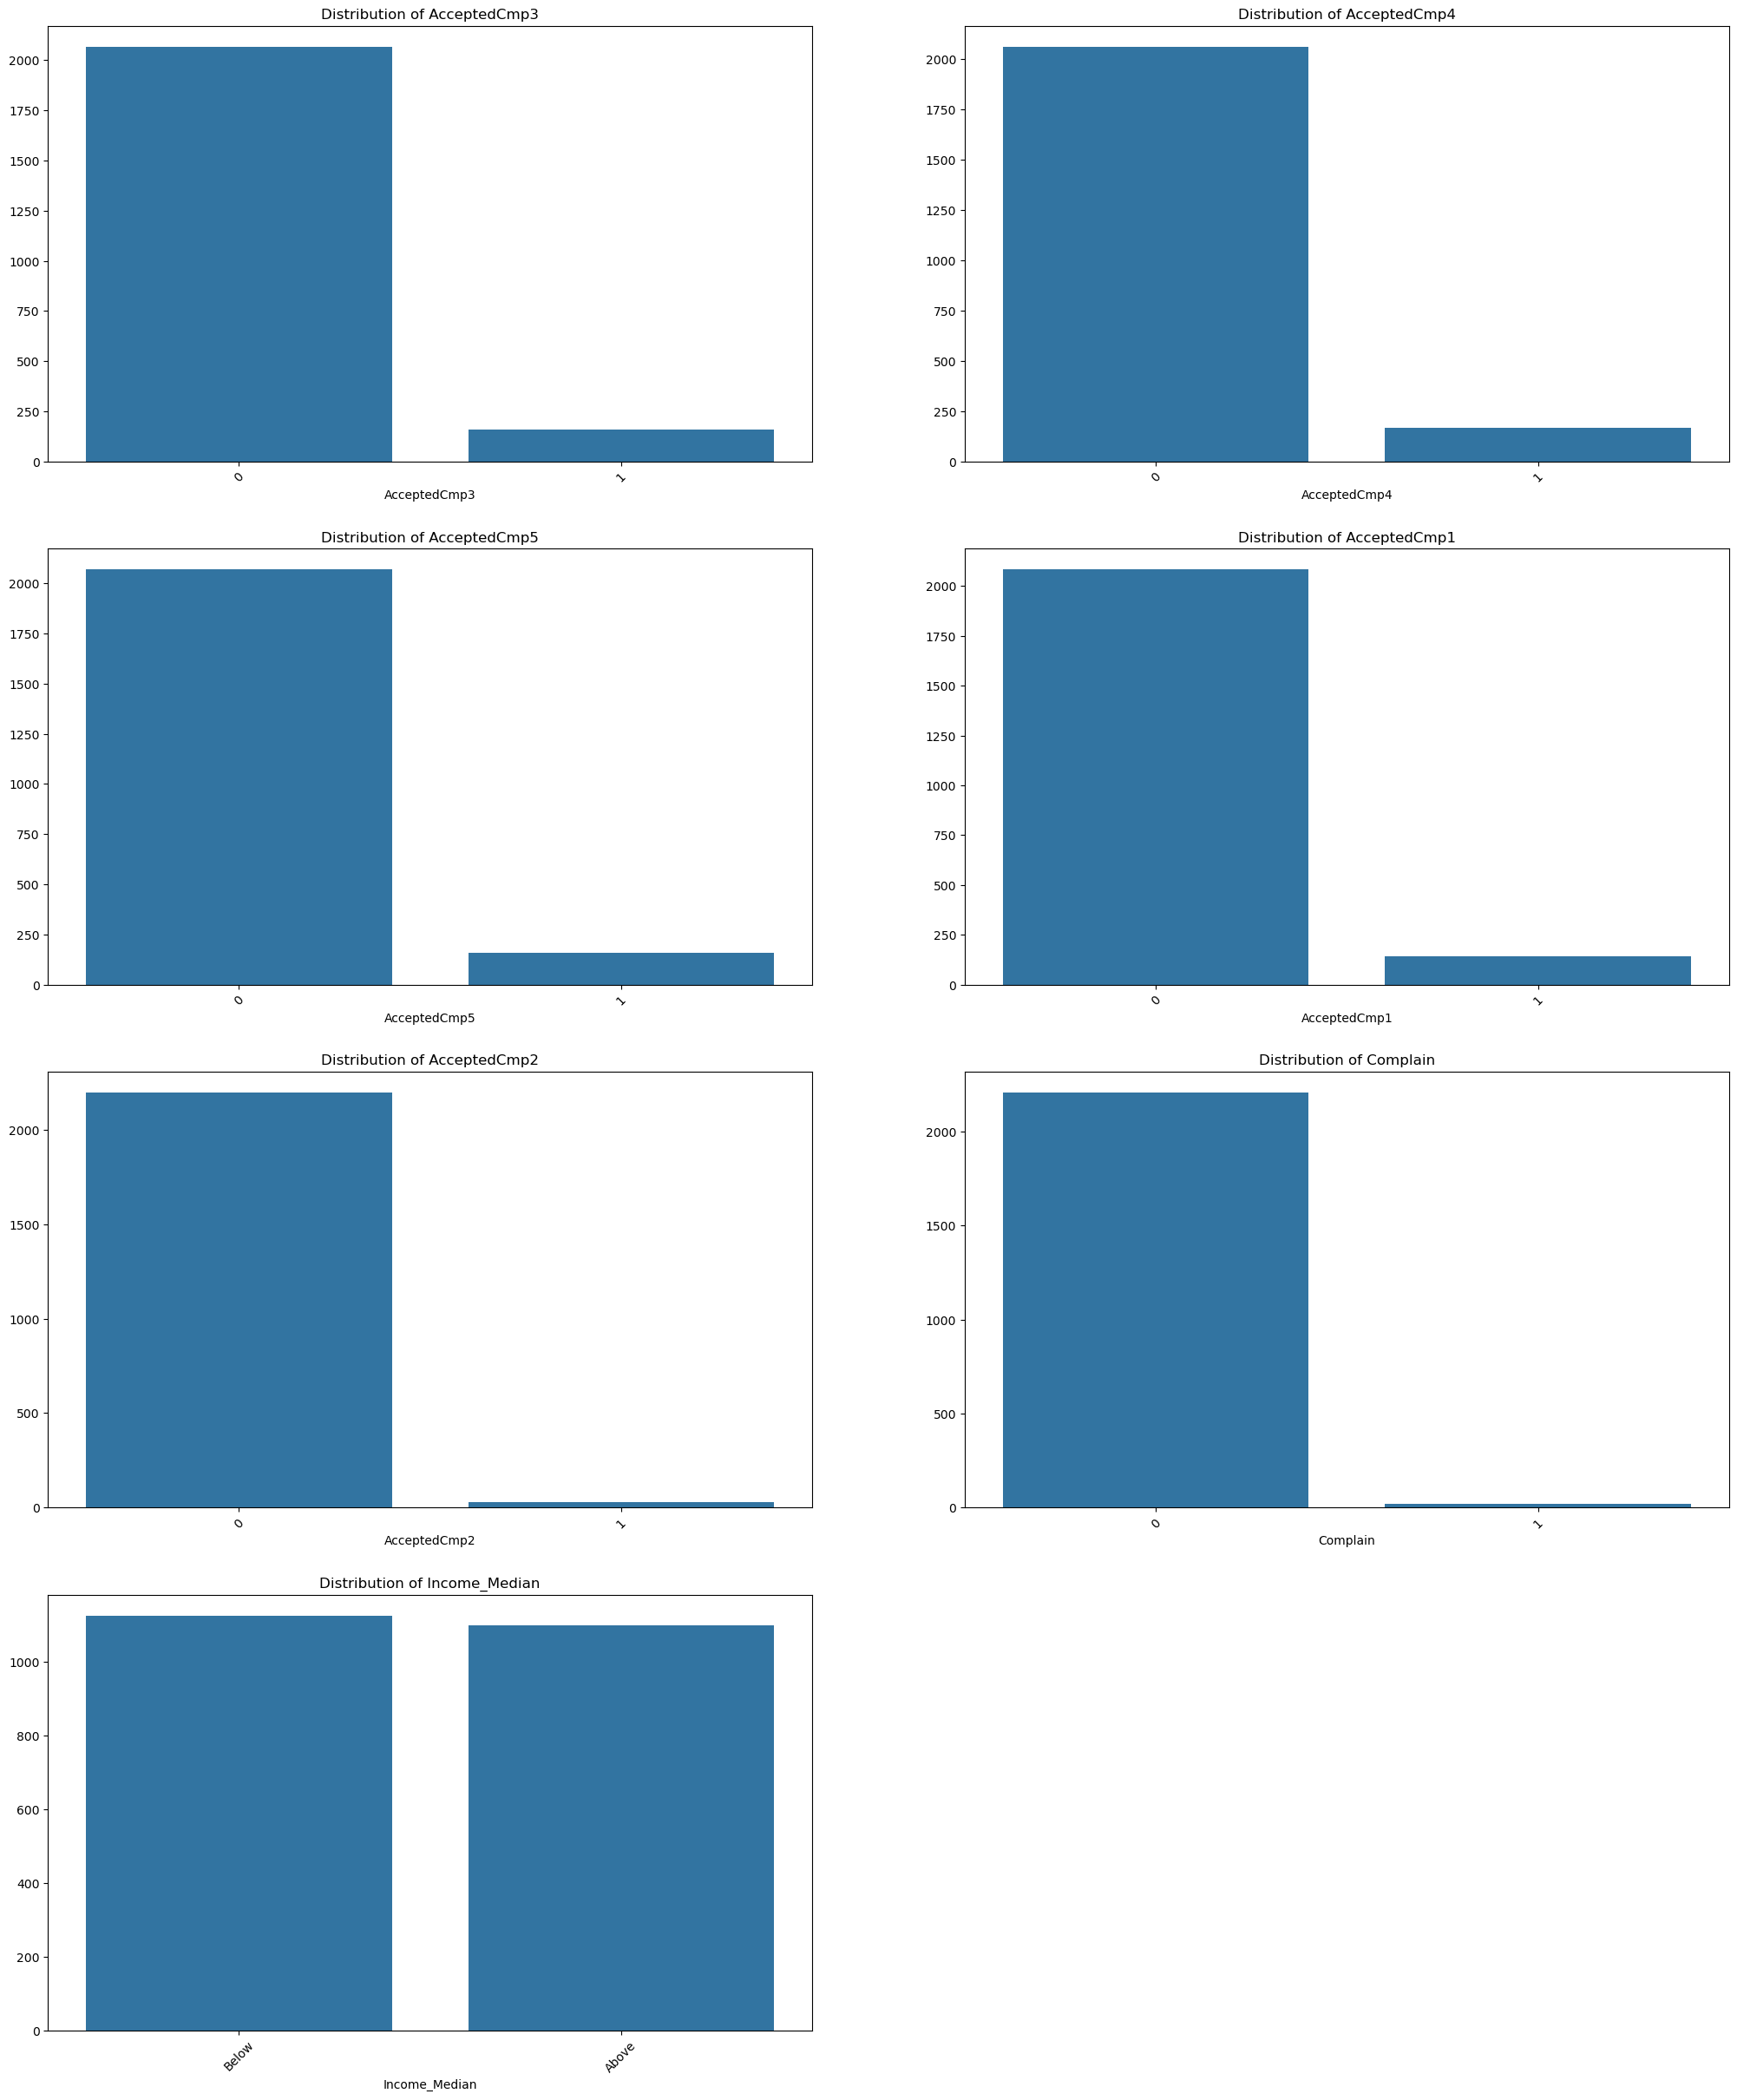

In [40]:
plt.figure(figsize=(25,30))

for i in range(len(binary_cols)):
    plt.subplot(4,2,i+1)
    counts = df_new[binary_cols[i]].value_counts()
    sns.barplot( x = counts.index,y = counts.values)
    plt.title("Distribution of {feature}".format(feature=binary_cols[i]))
    plt.xticks(rotation = 45)
plt.show()

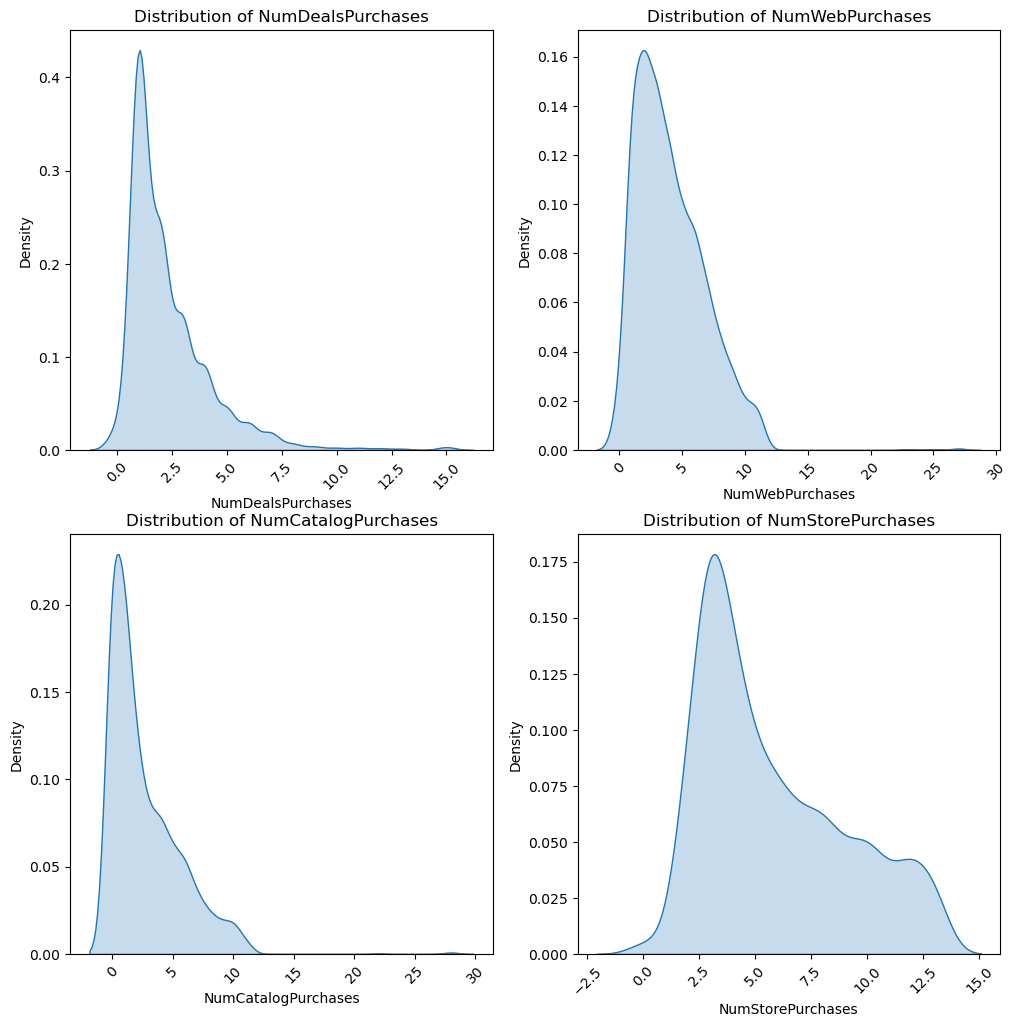

In [74]:
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
plt.figure(figsize=(12,12))
for i in range(len(purchase_cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot( df_new[purchase_cols[i]], fill = True)
    plt.title("Distribution of {feature}".format(feature=purchase_cols[i]))
    plt.xticks(rotation = 45)
plt.show()

Income Distribution

<Axes: xlabel='Income', ylabel='Count'>

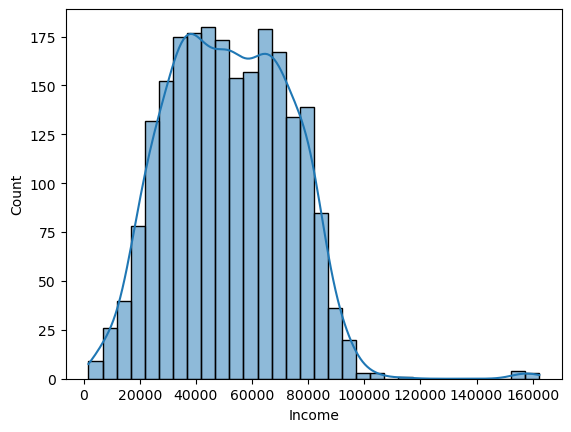

In [41]:
sns.histplot(df_new["Income"],kde = True)

**Univariate numerical analysis**

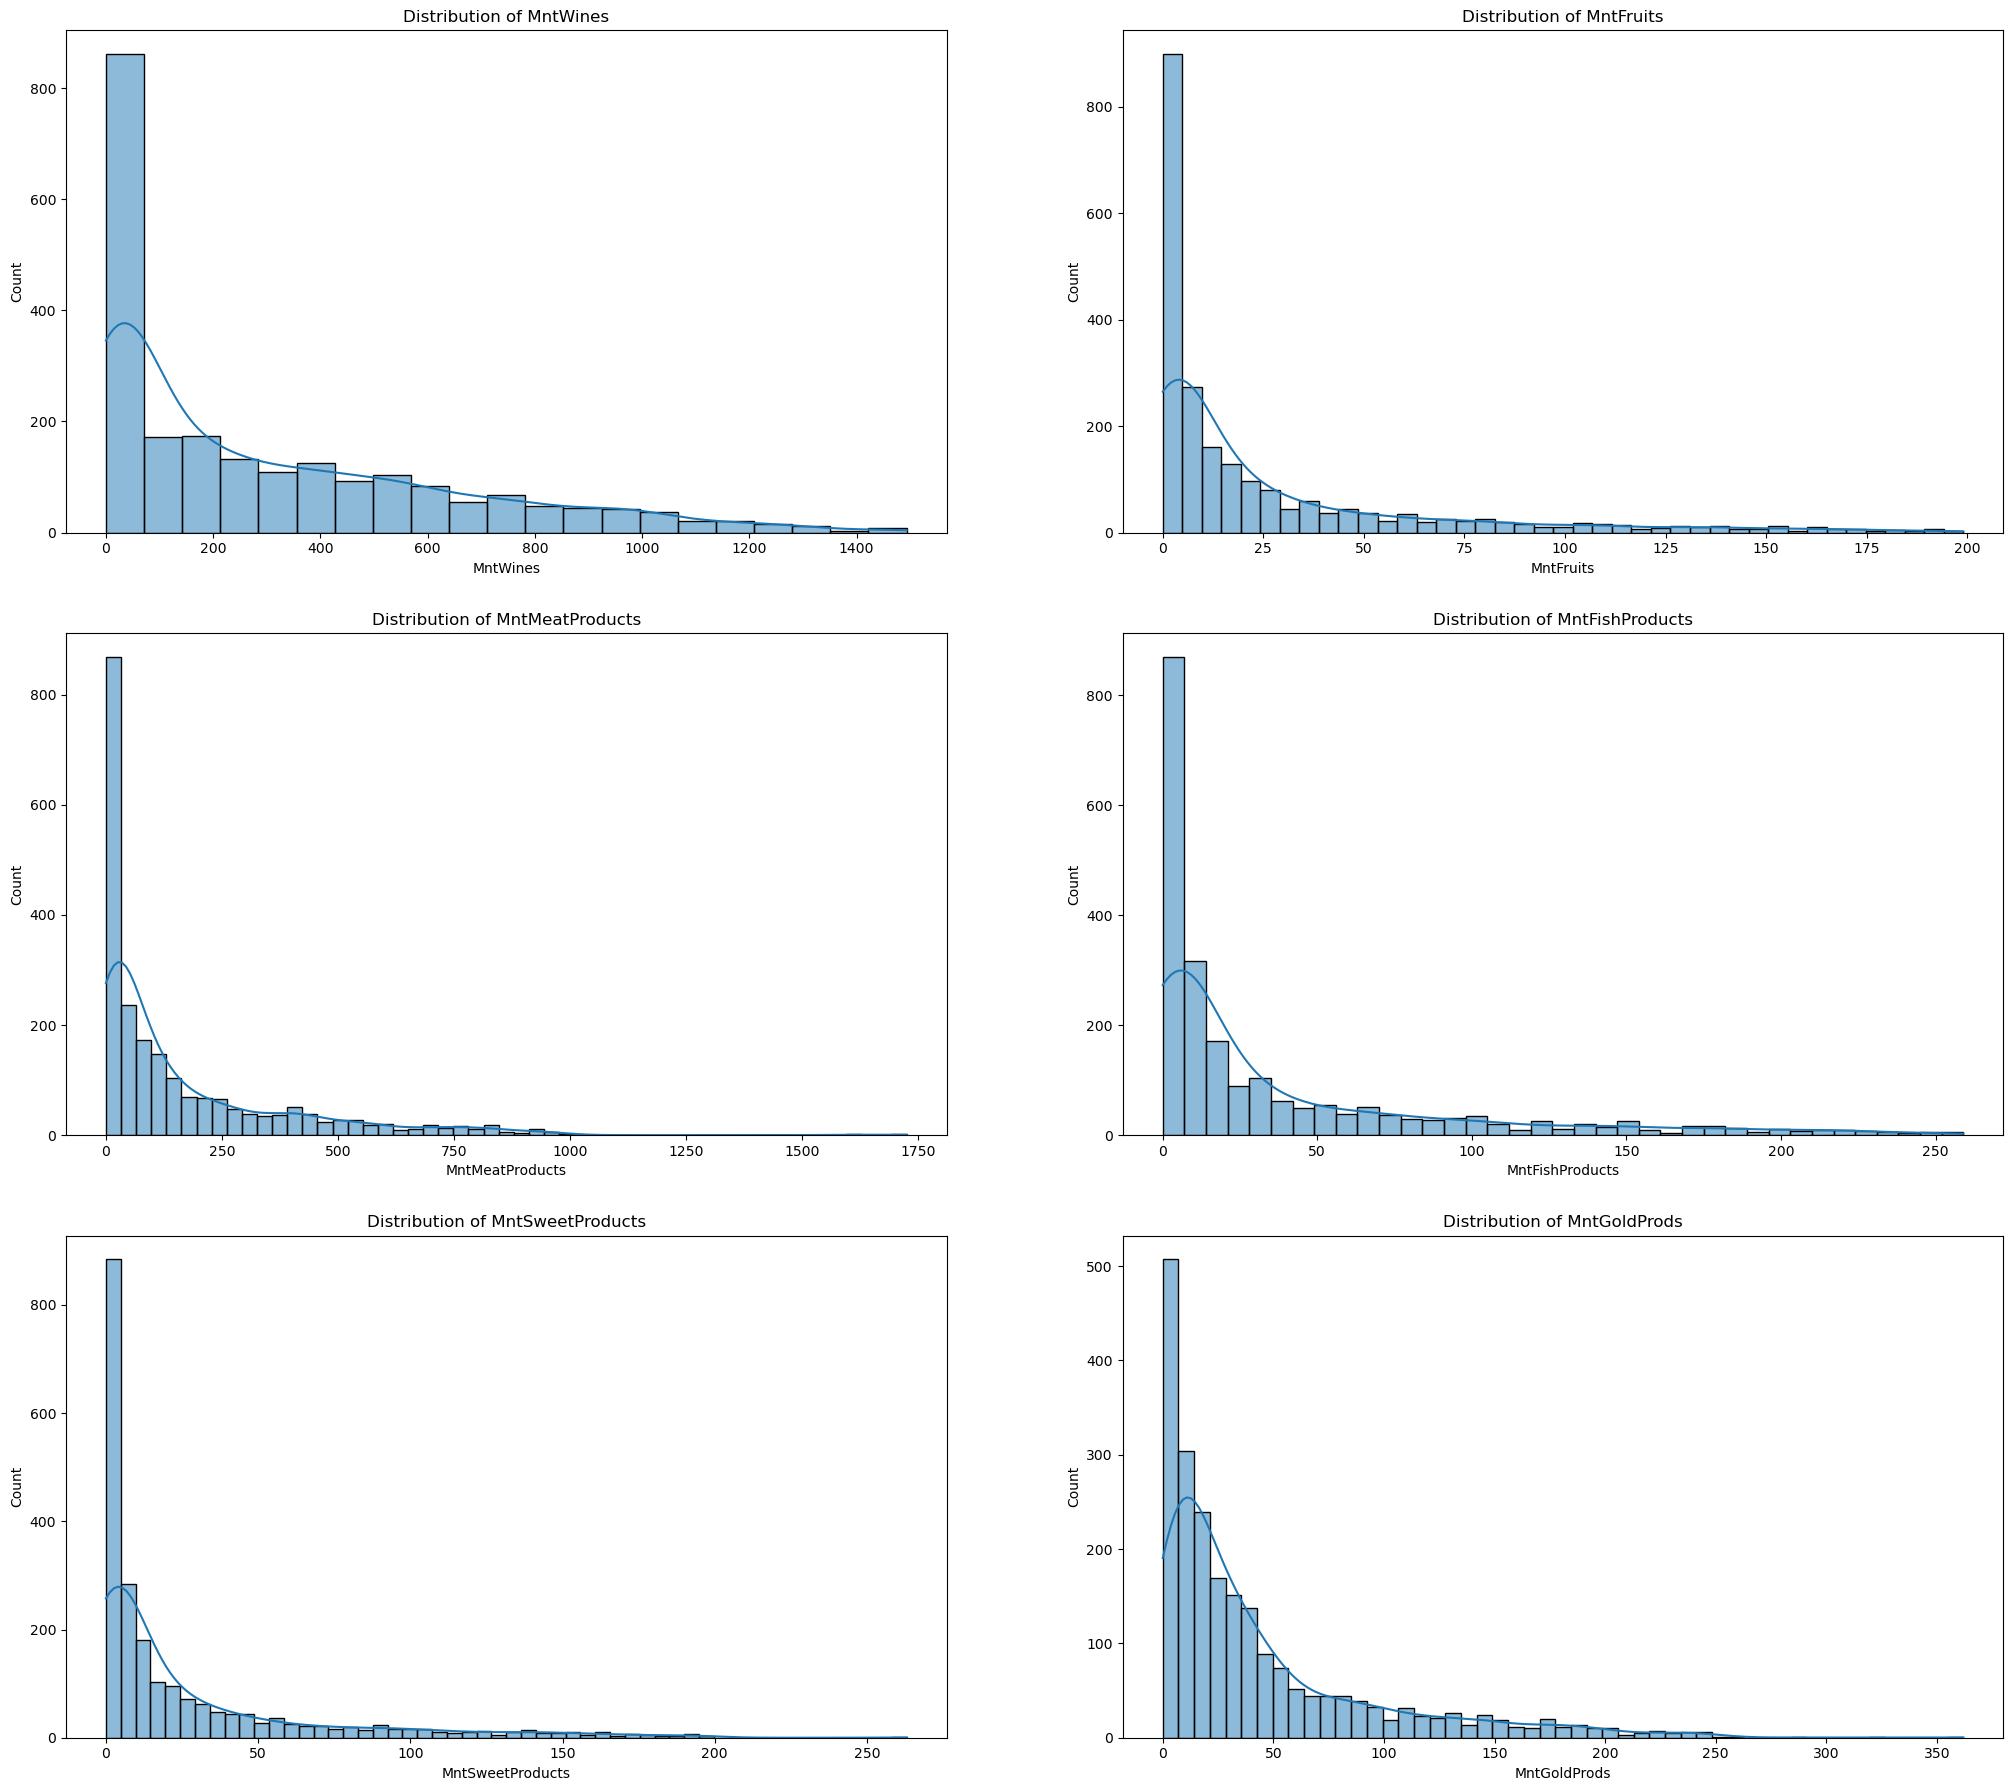

In [43]:
num_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
plt.figure(figsize=(25,30))

for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.histplot(df_new[num_cols[i]],kde = True)
    plt.title("Distribution of {feature}".format(feature=num_cols[i]))
plt.show()

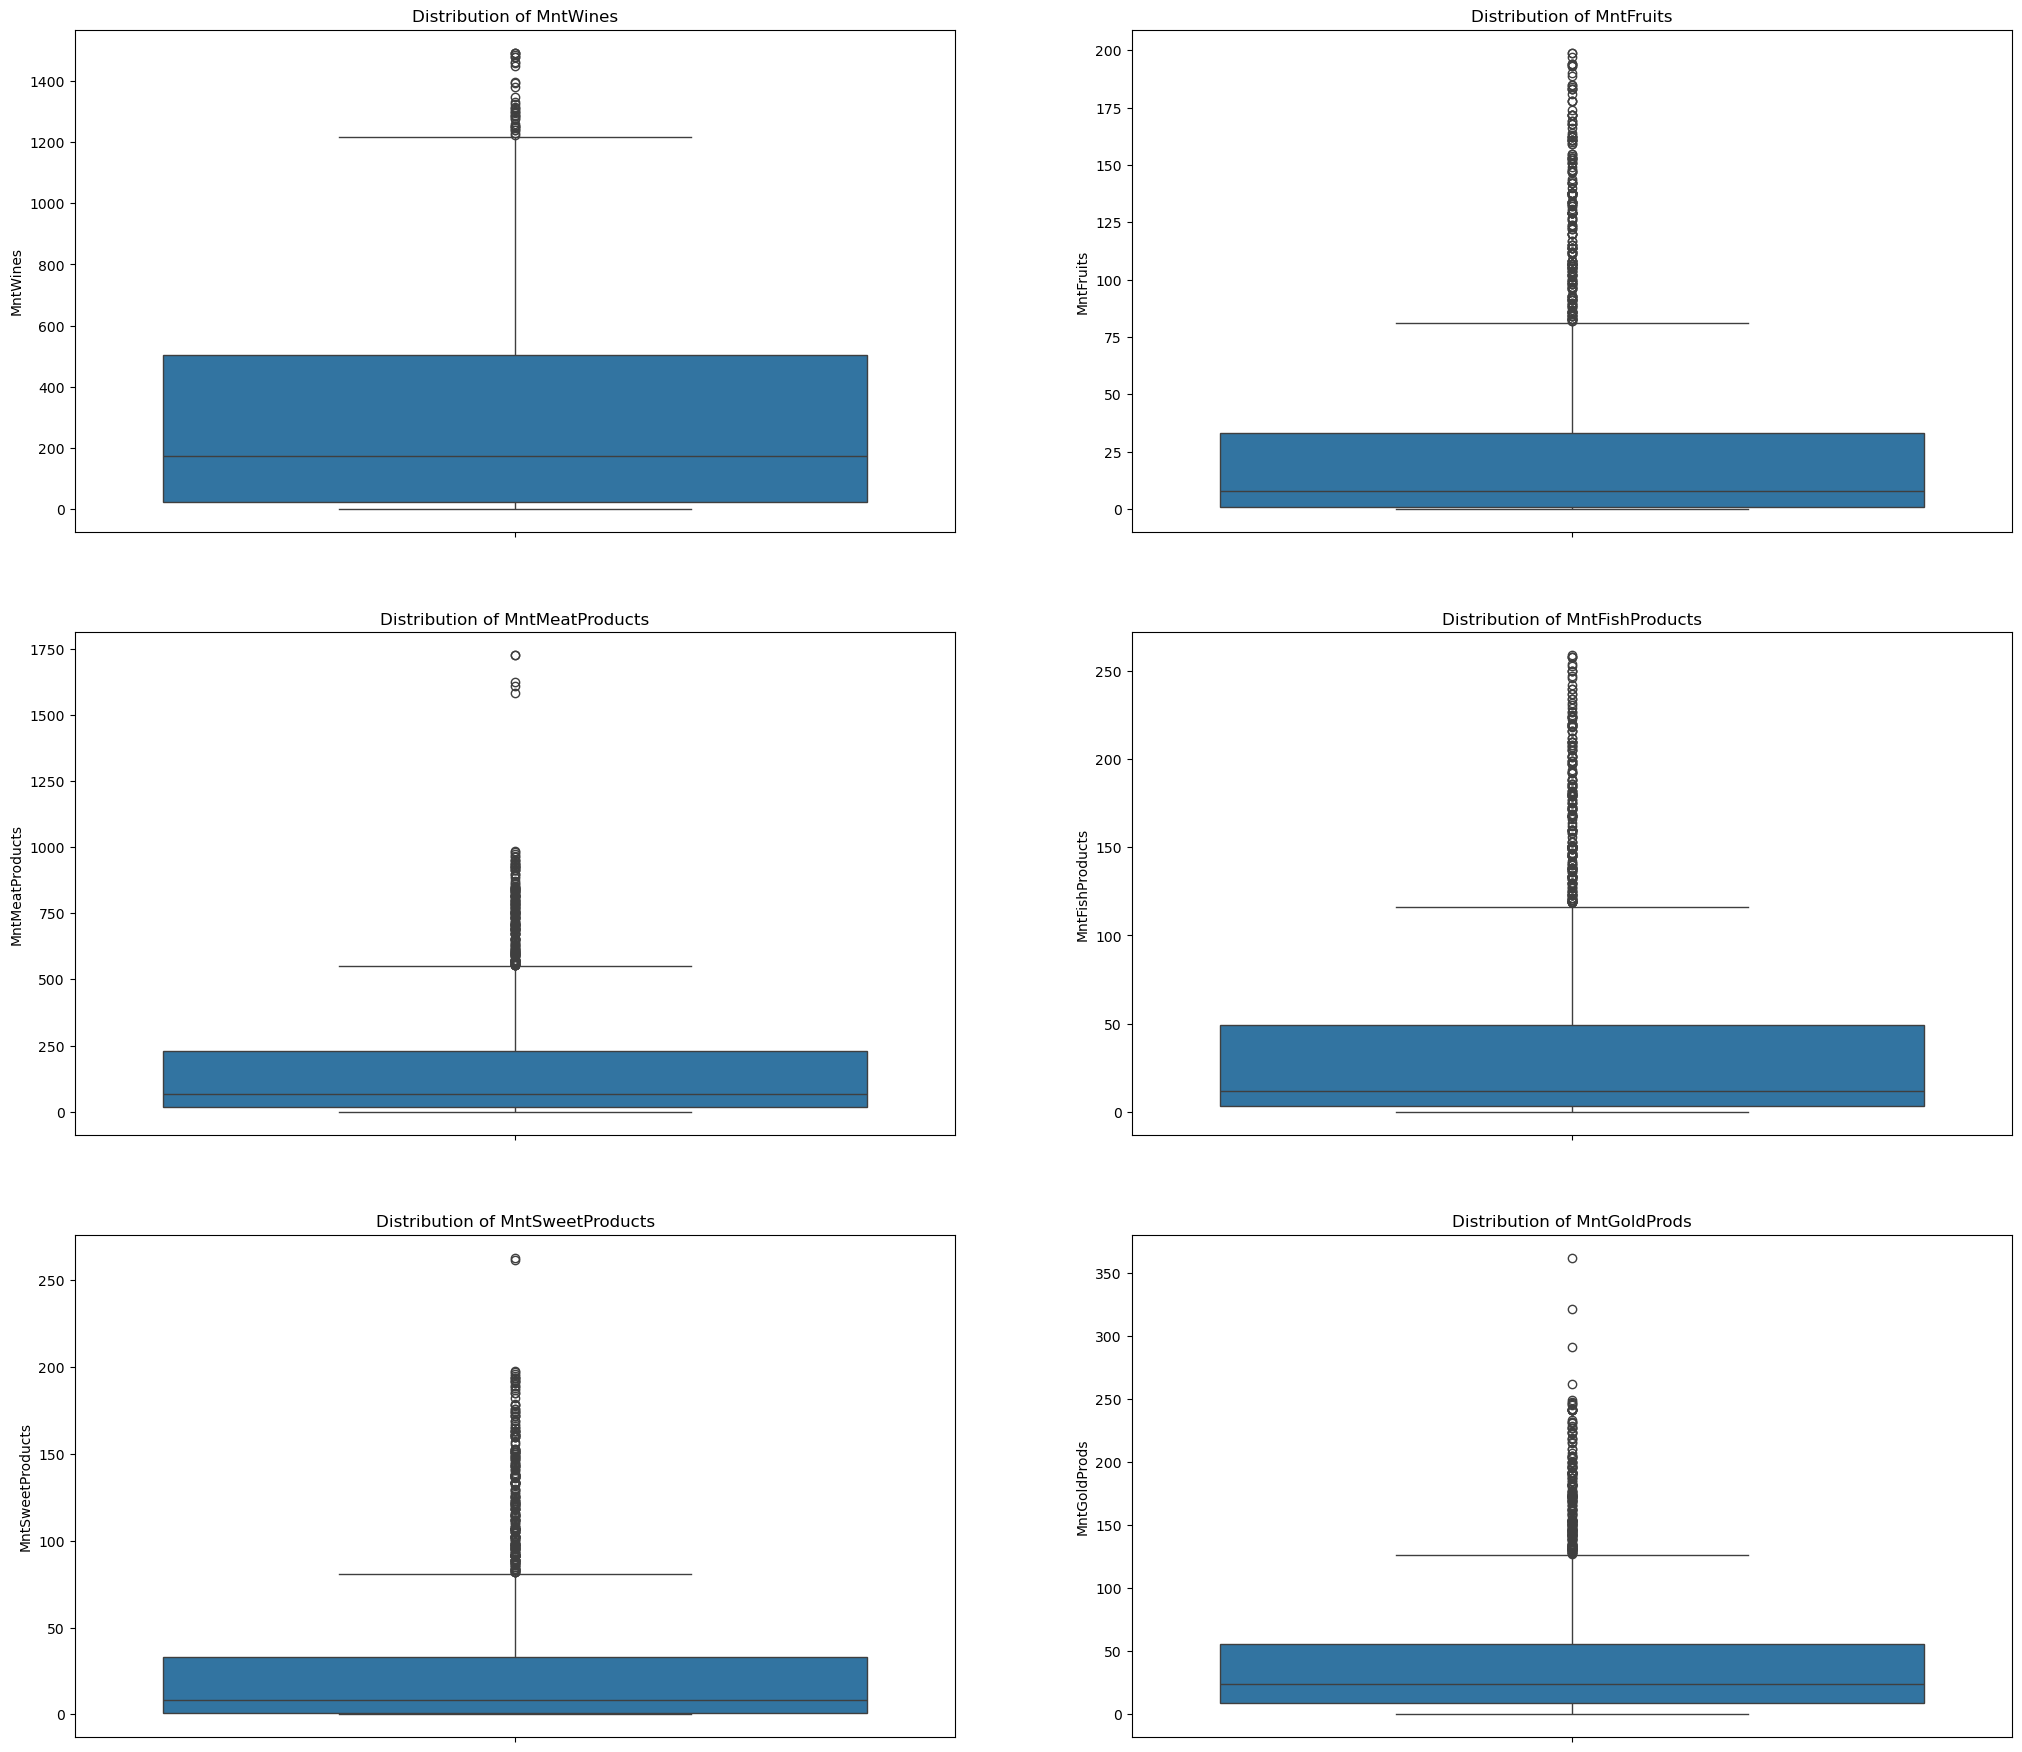

In [44]:
num_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
plt.figure(figsize=(25,30))

for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(df_new[num_cols[i]])
    plt.title("Distribution of {feature}".format(feature=num_cols[i]))
plt.show()

## Bivariate analysis

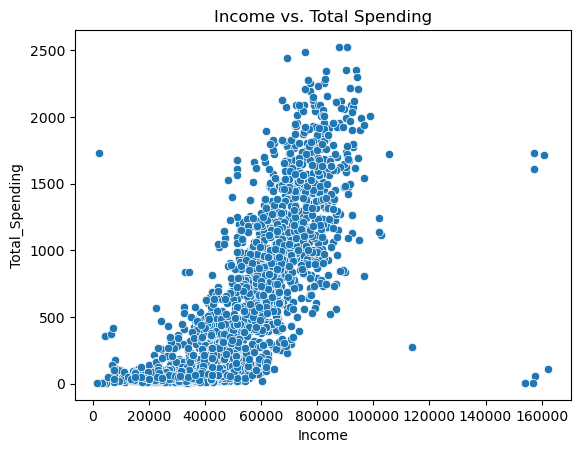

In [75]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)
sns.scatterplot(x='Income', y='Total_Spending', data=df)
plt.title('Income vs. Total Spending')
plt.show()

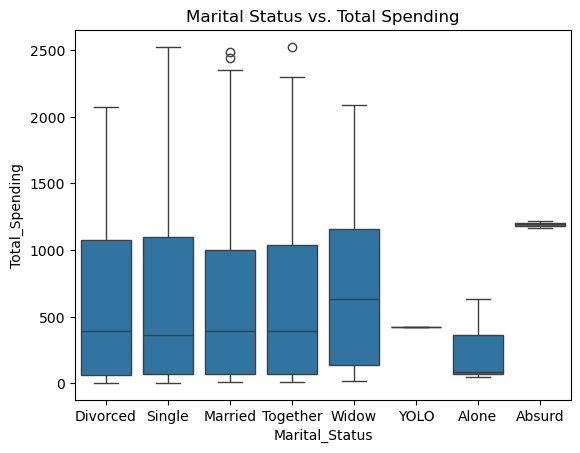

In [76]:
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.title('Marital Status vs. Total Spending')
plt.show()

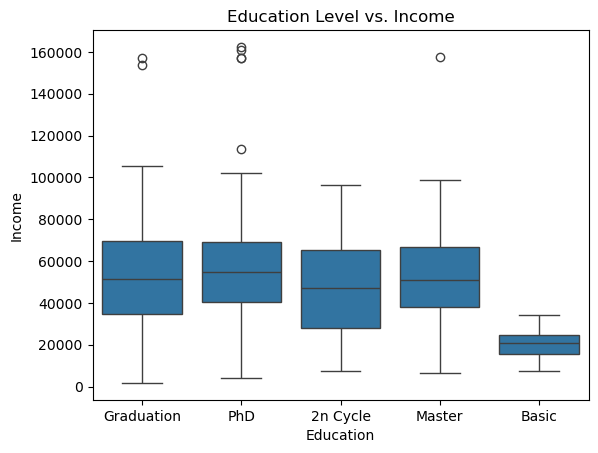

In [77]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Education Level vs. Income')
plt.show()

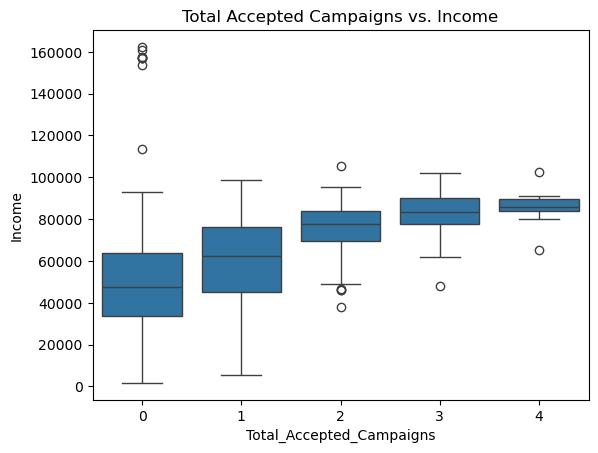

In [78]:
df['Total_Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
sns.boxplot(x='Total_Accepted_Campaigns', y='Income', data=df)
plt.title('Total Accepted Campaigns vs. Income')
plt.show()

## Multivariate analysis

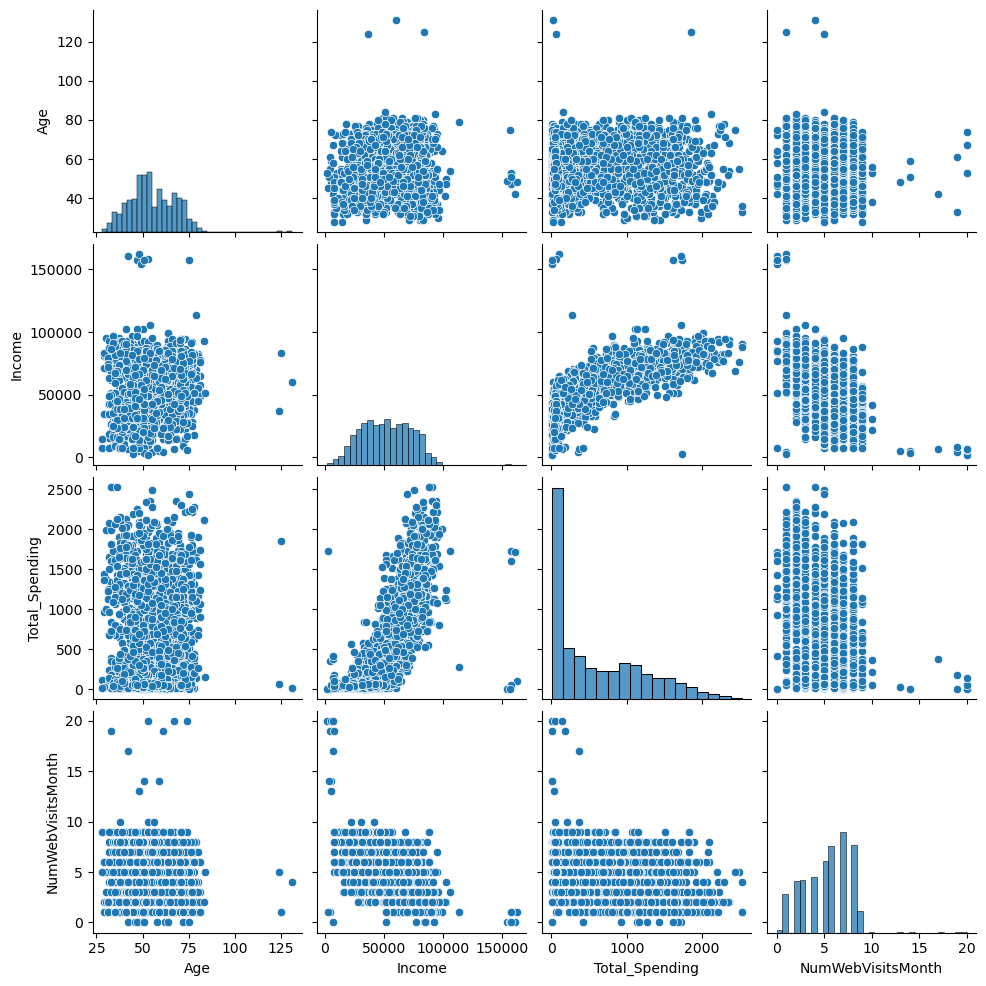

In [79]:
selected_cols = ['Age', 'Income', 'Total_Spending', 'NumWebVisitsMonth']
sns.pairplot(df[selected_cols])
plt.show()

In [80]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Country', 'Current Year', 'Age',
       'Total_Spending', 'Total_Accepted_Campaigns'],
      dtype='object')

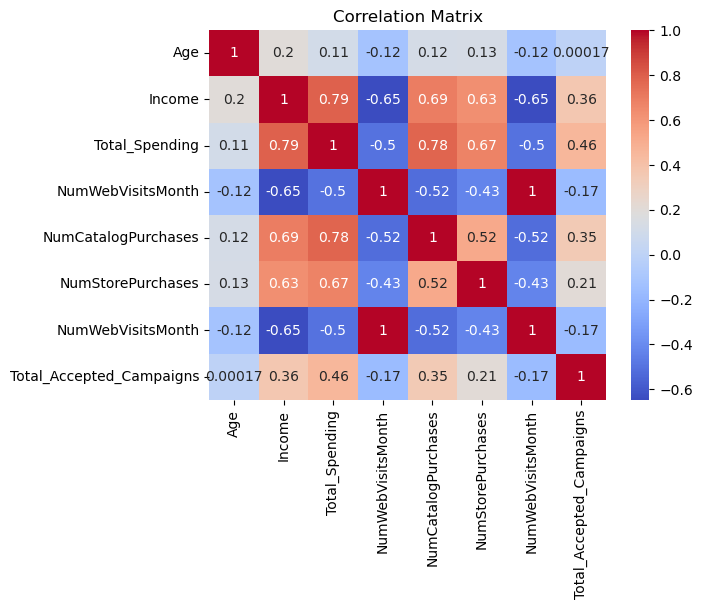

In [81]:
selected_cols = ['Age', 'Income', 'Total_Spending', 'NumWebVisitsMonth','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Total_Accepted_Campaigns']
corr = df[selected_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Hypothesis Testing

Is income of customers dependent on their education?

anova test is most relevant. Testing for assumptions first

Assumptions:
1. Normality
2. Equal variance
3. Independence

In [46]:
qualifications = df_new['Education'].unique().tolist()
qualifications

['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']

In [47]:
g1 = df_new[df_new['Education'] == 'Graduation']['Income'].values
g2 = df_new[df_new['Education'] == 'PhD']['Income'].values
g3 = df_new[df_new['Education'] == '2n Cycle']['Income'].values
g4 = df_new[df_new['Education'] == 'Master']['Income'].values
g5 = df_new[df_new['Education'] == 'Basic']['Income'].values

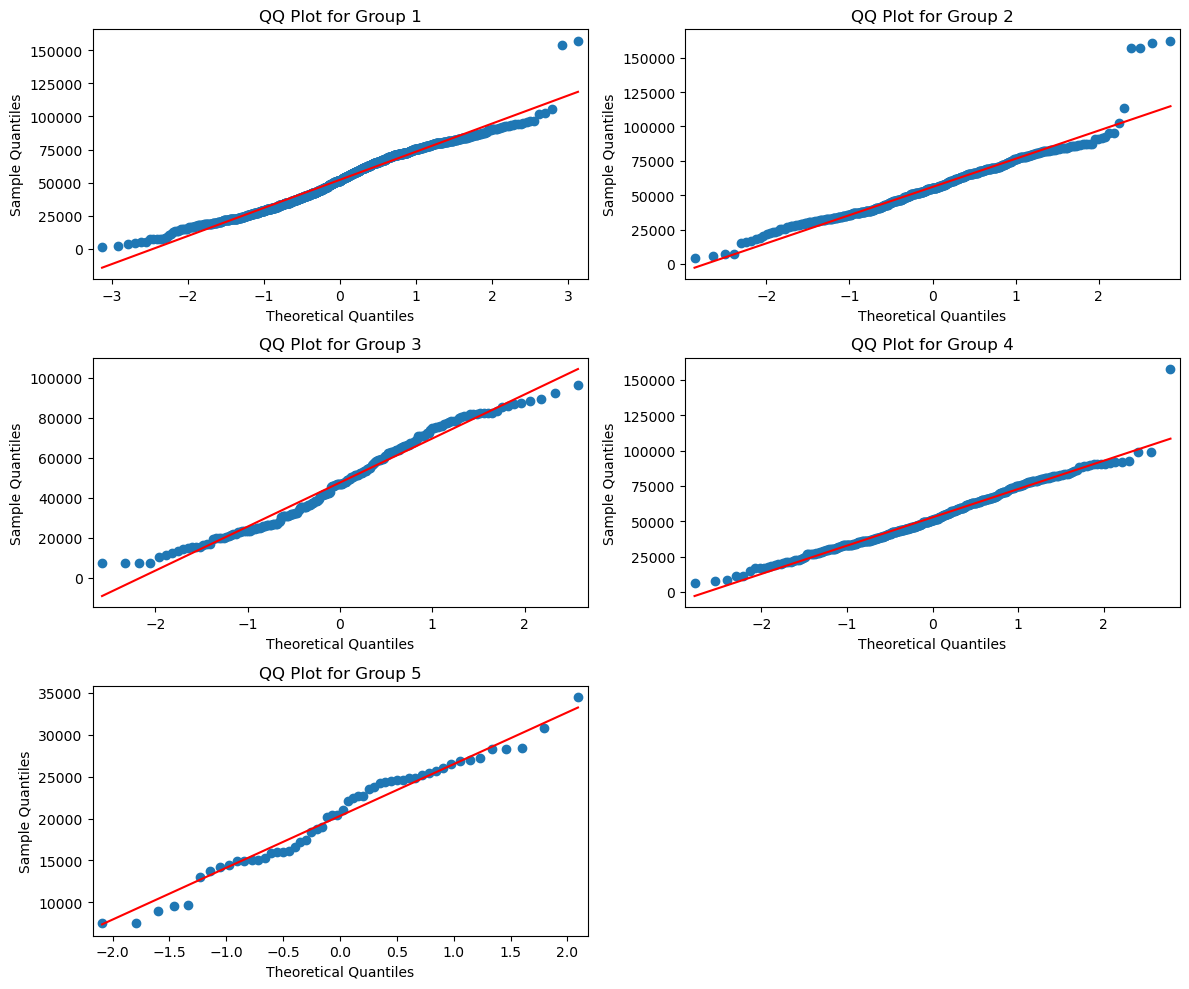

In [48]:
#QQplot for normality
groups = [g1,g2,g3,g4,g5]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for index in range(len(groups)):
    sm.qqplot(groups[index], line="s", ax=axes[index])
    axes[index].set_title(f"QQ Plot for Group {index + 1}")
    
for ax in axes[len(groups):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [49]:
#Levene test for equal variances
lev_pval = stats.levene(g1,g2,g3,g4,g5)[1]
print(lev_pval) # p-value
alpha = 0.05
if lev_pval < alpha:
    print("Reject null hypothesis")
    print("Samples do not have equal variances")
else:
    print("Fail to reject null hypothesis")
    print("Samples have equal variances")

1.9430691130594665e-14
Reject null hypothesis
Samples do not have equal variances


In [50]:
#Proceeding with Kruskal-Wallis test
stat,pval = stats.kruskal(g1,g2,g3,g4,g5)
print(pval)
alpha = 0.05
if pval < alpha:
    print("reject h0")
    print("income of customers dependent on their education")
else:
    print("fail to reject h0")
    print("income of customers not dependent on their education")

1.5267137447969328e-29
reject h0
income of customers dependent on their education


Do higher income people spend more

In [53]:
spend_list = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df_new['Total_Spend'] = df[spend_list].sum(axis =1)

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\2219903349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Total_Spend'] = df[spend_list].sum(axis =1)


Assumptions of t-test
1. Independence
2. Normality
3. Equal variances

In [55]:
above = df_new[df_new['Income_Median'] == 'Above']['Total_Spend']
below = df_new[df_new['Income_Median'] == 'Below']['Total_Spend']

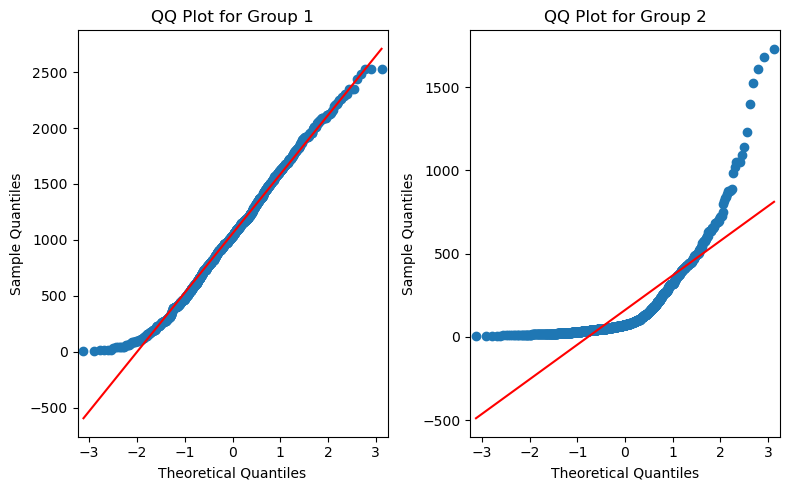

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes = axes.flatten()
groups = [above,below]
for index in range(len(groups)):
    sm.qqplot(groups[index], line="s", ax=axes[index])
    axes[index].set_title(f"QQ Plot for Group {index + 1}")
plt.tight_layout()
plt.show()

In [57]:
#Proceeding with Mann-Whitney test, as one of the groups doesn't follow normal distribution
stat, p_value = mannwhitneyu(above,below)
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis")
    print("There is a signficant difference in expenditure between income groups")
else:
    print("Fail to reject null hypothesis")
    print("There is no difference in expenditure between income groups")

Reject null hypothesis
There is a signficant difference in expenditure between income groups


Do couples spend more or less money on wine than people living alone

In [58]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [59]:
def rel_status(status):
    if status == 'Married' or status == 'Together':
        return "Couple"
    else:
        return "Single"

In [60]:
df_new["Relationship_Status"] = df_new['Marital_Status'].apply(rel_status)

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\1677621592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Relationship_Status"] = df_new['Marital_Status'].apply(rel_status)


In [62]:
couple = df_new[df_new['Relationship_Status'] == 'Couple']['MntWines']
single = df_new[df_new['Relationship_Status'] == 'Single']['MntWines']

Assumptions of t-test
1. Independence
2. Normality
3. Equal variances

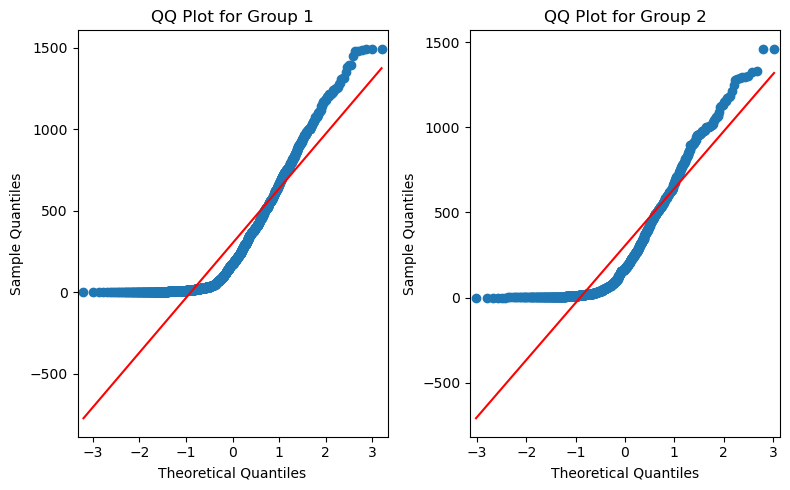

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes = axes.flatten()
groups = [couple,single]
for index in range(len(groups)):
    sm.qqplot(groups[index], line="s", ax=axes[index])
    axes[index].set_title(f"QQ Plot for Group {index + 1}")
plt.tight_layout()
plt.show()

In [64]:
#Proceeding with Mann-Whitney test, as one of the groups doesn't follow normal distribution
stat, p_value = mannwhitneyu(couple,single)
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis")
    print("There is a signficant difference in expenditure for wines between couples and singles")
else:
    print("Fail to reject null hypothesis")
    print("There is no difference in expenditure for wines between couples and singles")

Fail to reject null hypothesis
There is no difference in expenditure for wines between couples and singles


Are people with lower income more attracted to campaigns

In [66]:
#Counting the number of campaigns accepted would be more useful than creating a binary column 
df_new['Campaign_Sum'] = df_new[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']].sum(axis = 1)

C:\Users\sastr\AppData\Local\Temp\ipykernel_17320\3264065059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Campaign_Sum'] = df_new[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',


In [67]:
df_new['Campaign_Sum'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [68]:
above_median = df_new[df_new['Income_Median'] == 'Above']['Campaign_Sum']
below_median = df_new[df_new['Income_Median'] == 'Below']['Campaign_Sum']

In [69]:
#Mann-Whitney test
stat, p_value = mannwhitneyu(below_median, above_median)
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis")
    print("There is a signficant difference in number of campaigns accepted between 2 income groups")
else:
    print("Fail to reject null hypothesis")
    print("There is no difference in number of campaigns accepted between 2 income groups")

Reject null hypothesis
There is a signficant difference in number of campaigns accepted between 2 income groups


## Insights

1. The dataset consists of 2239 records and 27 columns, null values observed in Income column, which was imputed using the median column.
2. The 'Year_Birth' column had years of 1893,1900 and so on ,indicating a possible typo. 3 records were found before 1900. Records of age greater
   than 80 were removed.
3. Most number of customers are graduates.
4. Married or with a partner described the marital status of most customers in this dataset.
5. Most purchases were made from Country - SP (Assuming it to be Spain).
6. The age bracket with the highest number of customers is : 45-55.
7. Highest number of customers do not have kids or teenagers, with second highest numbers of the customer having one kid and/or teenager.
8. August was the month and 2013 the year wherein highest number of customers joined the service.
9. Across campaigns, the rejection (value 0) is much higher to the acceptance rate. 
10. There is an equal balance of customers who have income above and below the median.
11. In visual analysis we observe a positive relation between Income and Total_Spend , Widows having a higher median on total expenditure and 
    customers with Phd having a higher median income. 
12. There is a positive relation between Total_Spending and NumCatalogPurchases, NumStorePurchases indicating a possibility of
    most purchases made offline.
13. The Kruskal-Wallis test showed that income of customers is dependent on education.
14. There is a significant difference in expenditure between those who have incomes above or below the median.
15. Couples and Singles have a similar trend in expenditure of wines and no significant difference.
16. There is a distinction in acceptance of campagins between income groups. Suggesting a possibility of 
    promoting campaigns more to one class than the other.

## Takeaways

**Low Acceptance Rates**: The generally low acceptance rates across campaigns highlight a potential area of 
improvement in campaign targeting or messaging. It may be necessary to re-evaluate the design and delivery of campaigns to increase their effectiveness.
**Income and Campaign Acceptance**: The difference in campaign acceptance between income groups suggests that campaigns may 
resonate more with certain income classes. 
This could inform a strategy where campaigns are tailored differently for higher and lower-income customers to increase overall effectiveness.

## Conclusion

The dataset reveals that middle-aged, well-educated, 
and financially stable individuals form the core customer base. 
These customers are more likely to spend more, particularly through offline channels.
The company may need to improve its campaign strategies, focusing on tailoring messages to 
different income groups to enhance effectiveness. 
Understanding these insights can help in refining marketing strategies, optimizing product offerings, 
and ultimately improving customer engagement and revenue.